In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wids-2021/TrainingWiDS2021.csv


In [2]:
train = pd.read_csv('/kaggle/input/wids-2021/TrainingWiDS2021.csv')

**Data Preprocessing for Train data**

In [3]:
train.shape

(130157, 181)

In [4]:
train.columns

Index(['Unnamed: 0', 'encounter_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height',
       'hospital_admit_source',
       ...
       'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'diabetes_mellitus'],
      dtype='object', length=181)

In [5]:
train.drop("Unnamed: 0", axis = 1, inplace = True)

In [6]:
train.isnull().sum()

encounter_id                      0
hospital_id                       0
age                            4988
bmi                            4490
elective_surgery                  0
                               ... 
immunosuppression                 0
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
diabetes_mellitus                 0
Length: 180, dtype: int64

In [7]:
train.isnull().sum().sum()

8018193

In [8]:
# finding those columns with >70% null values
train.columns[train.isnull().mean() > .70].tolist()

['fio2_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_sysbp_invasive_max',
 'd1_sysbp_invasive_min',
 'h1_diasbp_invasive_max',
 'h1_diasbp_invasive_min',
 'h1_mbp_invasive_max',
 'h1_mbp_invasive_min',
 'h1_sysbp_invasive_max',
 'h1_sysbp_invasive_min',
 'd1_lactate_max',
 'd1_lactate_min',
 'h1_albumin_max',
 'h1_albumin_min',
 'h1_bilirubin_max',
 'h1_bilirubin_min',
 'h1_bun_max',
 'h1_bun_min',
 'h1_calcium_max',
 'h1_calcium_min',
 'h1_creatinine_max',
 'h1_creatinine_min',
 'h1_hco3_max',
 'h1_hco3_min',
 'h1_hemaglobin_max',
 'h1_hemaglobin_min',
 'h1_hematocrit_max',
 'h1_hematocrit_min',
 'h1_lactate_max',
 'h1_lactate_min',
 'h1_platelets_max',
 'h1_platelets_min',
 'h1_potassium_max',
 'h1_potassium_min',
 'h1_sodium_max',
 'h1_sodium_min',
 'h1_wbc_max',
 'h1_wbc_min',
 'd1_pao2fio2ratio_max',
 'd1_pao2fio2ratio_min',
 'h1_arterial_pco

In [9]:
# dropping the columns with >70% null values
for col in train:
    if train[col].isnull().mean() > .70:
        train=train.drop(col, axis = 1)

In [10]:
train.shape

(130157, 125)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


<AxesSubplot:>

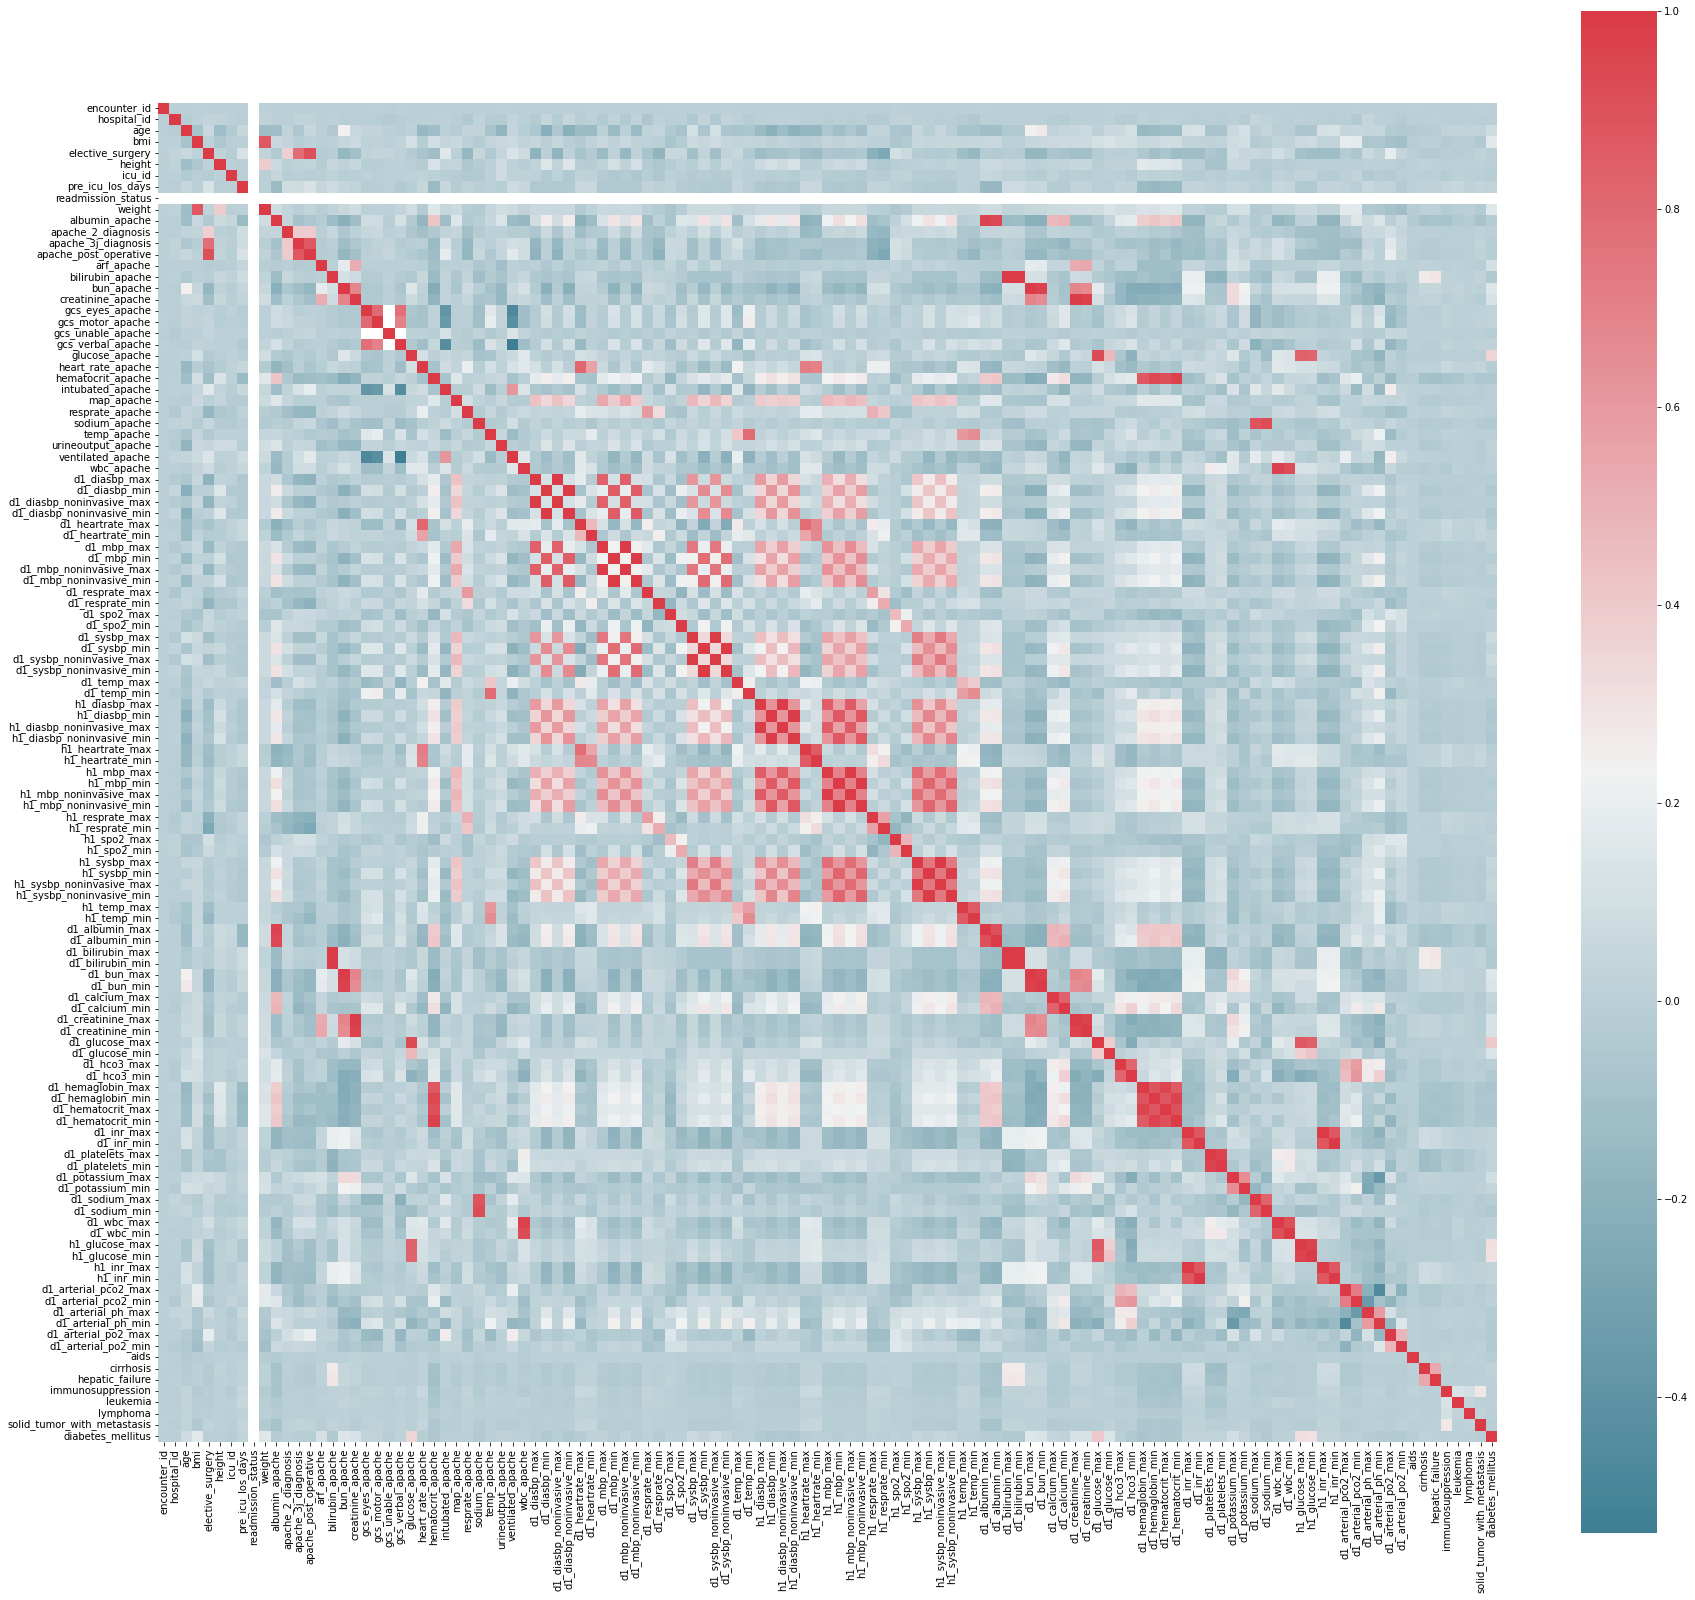

In [11]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# run correlation matrix and plot
f, ax = plt.subplots(figsize=(30, 28))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

In [12]:
# dropping the columns which have no relation with the independent variable
cols_drop = ['encounter_id', 'hospital_id', 'elective_surgery','ethnicity','hospital_admit_source','icu_admit_source',
             'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days','readmission_status']
train = train.drop(cols_drop, axis=1)
train.shape

(130157, 114)

In [13]:
train.dtypes

age                            float64
bmi                            float64
gender                          object
height                         float64
weight                         float64
                                ...   
immunosuppression                int64
leukemia                         int64
lymphoma                         int64
solid_tumor_with_metastasis      int64
diabetes_mellitus                int64
Length: 114, dtype: object

In [14]:
train.dtypes.value_counts()

float64    101
int64       12
object       1
dtype: int64

In [15]:
train['gender'].value_counts(dropna = False)

M      70518
F      59573
NaN       66
Name: gender, dtype: int64

In [16]:
# Missing value for Categorical variables
train['gender'].fillna(value = 'M', inplace = True)

In [17]:
train['gender'].value_counts(dropna = False)

M    70584
F    59573
Name: gender, dtype: int64

In [18]:
# The category codes of the categorical data. Codes are an array of integers which are the positions of the actual 
# values in the categorical column.

train['gender'] = pd.Categorical(train['gender']).codes

In [19]:
# replacing null values in the Numerical data columns with the mean of their values
for col in train.columns:
    train[col].fillna(train[col].mean(), inplace=True)

In [20]:
train.isnull().sum()

age                            0
bmi                            0
gender                         0
height                         0
weight                         0
                              ..
immunosuppression              0
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
diabetes_mellitus              0
Length: 114, dtype: int64

In [21]:
#train['age'].fillna(train['age'].mean(), inplace = True)

In [22]:
train.isnull().sum().sum()

0

In [23]:
train.dtypes.value_counts()

float64    101
int64       12
int8         1
dtype: int64

**XG Boost**

In [24]:
# Extracting the dependent and independent variables
x = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

In [25]:
# Splitting the train dataset into testing and training set
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size = 0.30,random_state = 0)

In [26]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
xTrain= st_x.fit_transform(xTrain)    
xTest= st_x.transform(xTest) 

In [27]:
from xgboost import XGBClassifier  
import time

In [28]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(xTrain, yTrain)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(xTest)
prediction_end = time.perf_counter()
acc_xgb = (preds == yTest).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 82.61
Time consumed for training: 27.846
Time consumed for prediction: 0.06489 seconds


**Random Forest**

In [29]:
from sklearn.ensemble import RandomForestClassifier
import time

In [30]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(xTrain, yTrain)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(xTest)
prediction_end = time.perf_counter()
acc_rfc = (preds == yTest).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 80.56
Time consumed for training: 6.100 seconds
Time consumed for prediction: 0.14052 seconds
